# Naive Bayes

## Paso 1: Carga del conjunto de datos

In [2]:
import logging
import pickle
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import(
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv'
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


In [7]:
df_raw.sample(10, random_state=42)

,package_name,review,polarity
709,com.opera.mini.native,love/hate has bug and security issues. i trie...,0
439,com.whatsapp,whatsapp i use this app now that blackberry m...,1
840,com.hamropatro,usefully verry nice app,1
720,com.opera.mini.native,fonts why in the heck is this thing analysing...,0
39,com.facebook.katana,app doesn't work after latest upgrade the fac...,0
290,com.tencent.mm,wechat wallet still disappears people have be...,0
300,com.tencent.mm,wechat 6.3 with wechat out is no longer free ...,0
333,com.viber.voip,good app for call and texting. overall everyt...,0
208,com.supercell.clashofclans,it's been 1 or 2 months and yall still haven...,0
136,com.king.candycrushsaga,the scoring system on facebook gains more po...,0


## Paso 2: Data preprocessing

In [8]:
def apply_preprocess(df):
    df = df.drop("package_name", axis=1)
    df["review"] = df["review"].str.strip().str.lower()

    return df

df_baking = apply_preprocess(df_raw)
df_baking['polarity'] = df_baking['polarity'].apply(lambda x: 'positive' if x==1 else 'negative')
df_baking['polarity'] = df_baking['polarity'].astype('category')
stopwords.words('english')
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   review    891 non-null    object  
 1   polarity  891 non-null    category
dtypes: category(1), object(1)
memory usage: 8.1+ KB


## Paso 3:  Exploratory Data Analysis

In [10]:
df_train, df_test = train_test_split(
    df, test_size=0.2,
    stratify=df['polarity'],
    random_state=42
)

In [11]:
df_train.describe(include='category').T

,count,unique,top,freq
polarity,712,2,negative,467


In [13]:
df_train['review'].sample(20, random_state=42)

444    can't work after latest update i keep getting ...
548    between, android or windows10,my tablet or my ...
830                good need to use every nepali peoples
818    currency convertor not working! it only shows ...
842    i love this app i love this app & its better t...
521    good but not great app is awesome, saves me a ...
611    useful app very useful app in my opinion. note...
398    latest update should be clientside the most re...
515    extremely useful app, but has a tendency every...
218    it was a great game . until the last update . ...
798    utter garbage didn't think i would be saying t...
155    not happy updated every week they say, erm get...
341    voice messages problem most times recorded mes...
78     could be so much better if they'd stop making ...
539    not enough space 6g is nothing these days. nee...
683    very good apps!!! obviously, no doubt it is ve...
227    not a fan of new update new update makes it di...
574    doesn't seem to work at 

# Paso 4: Machine learning

In [14]:
X_train = df_train['review'].copy() # cuando trabajamos con texto es solo []
y_train = df_train['polarity'].copy()
X_test = df_test['review'].copy()
y_test = df_test['polarity'].copy()

In [15]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [16]:
clf_nb_p = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

In [17]:
clf_nb_p.fit(X_train,y_train_enc)

Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english')),
                ('nb', MultinomialNB())])

In [18]:
y_hat = clf_nb_p.predict(X_test)
print(f'accuracy: {accuracy_score(y_test_enc, y_hat):.2f}')
print(f'f1_score: {f1_score(y_test_enc, y_hat):.2f}')

accuracy: 0.85
f1_score: 0.76


              precision    recall  f1-score   support

    negative       0.84      0.96      0.90       117
    positive       0.89      0.66      0.76        62

    accuracy                           0.85       179
   macro avg       0.87      0.81      0.83       179
weighted avg       0.86      0.85      0.85       179



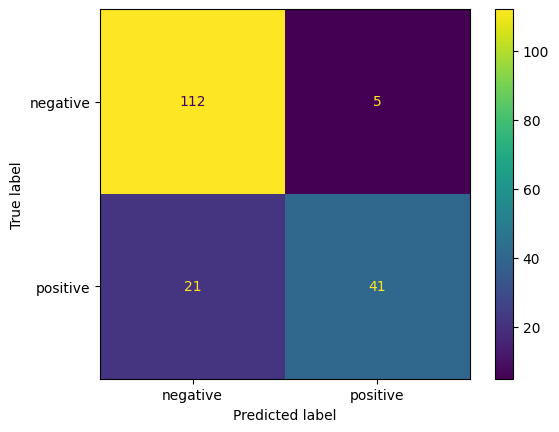

In [19]:
print(classification_report(y_test_enc, y_hat, target_names=label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test_enc,y_hat,display_labels=label_encoder.classes_)
plt.show()